In [1]:
import numpy as np
from sympy import * 
import sympy as sym
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import math
import pandas as pd
from scipy.optimize import curve_fit





#Statistik wie die Großen


#Arithmetischer Mittelwert

def mittelwert(Messreihe):
    return sum(Messreihe)/len(Messreihe)


#Empirische Varianz

def empVar(Messreihe):
    if len(Messreihe) < 2:
        return 'Die Messreihe muss mindestens zwei Messwerte beinhalten'
    empvar = 0
    mw = mittelwert(Messreihe)
    indexarray = np.arange(0,len(Messreihe))
    for index in indexarray:
        empvar += (Messreihe[index] - mw)**2
    return (1/(len(Messreihe)-1))*empvar


#Empirische Standardabweichung

def empStan(Messreihe):
    return empVar(Messreihe)**(1/2)


#Standardabweichung des Mittelwerts

def Stanmi(Messreihe):
    return empStan(Messreihe)/(len(Messreihe)**(1/2))


#Standardabweichung der empirischen Standardabweichung:

def StanempStan(Messreihe):
    return empStan(Messreihe)/((2*(len(Messreihe)-1))**(1/2))



#Gauß-Fehlerfortpflanzung
# Definiere die Symbole, Parameter, die Funktion, die Unsicherheiten und die Bestwerte:

#x, y = symbols('? ? ')
#params = [?,?]
#Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
#Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
#exp = ? 

def fehlerfort(exp, params, Bestwerte, Unsicherheiten):
    delexp = 0
    for i in np.arange(0, len(params)):
        delexp += (sym.lambdify(params, sym.diff(exp,params[i]), modules=['math'])(*Bestwerte)*Unsicherheiten[i])**2
    return delexp**(1/2)

# Korrelierte Fehlerfortpflanzung

def korfehlerfort(exp, params, Bestwerte, Unsicherheiten, Eingang):
    #x, y = symbols('? ? ')
    #Eingang= [?,?,?]  #Liste von allen Arrays mit allen Werten der Parameter um Korrelationskoeffizienten zu bestimmen
    #params = [?,?]
    #Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
    #Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
    #exp = ? 
    A = []
    for i in np.arange(len(params)):
        A.append(sym.lambdify(params, sym.diff(exp,params[i]), modules=['math'])(*Bestwerte))
    return np.sqrt(abs((np.dot(A,np.dot(kovmatrix(Eingang,Unsicherheiten),A)))))
        
        

#x, y = symbols('? ? ')
# Eingang= [?,?,?]  #Liste von allen Arrays mit allen Werten der Parameter um Korrelationskoeffizienten zu bestimmen
#params = [?,?]
#Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
#Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
#exp = ? 

# Kovarianzmatrix V:
def kovmatrix(Eingang, Unsicherheiten):
    if len(Eingang)!= len(Unsicherheiten):
        return 'Eingangsvariablen und Fehler stimmen nicht überein'
    V = []
    for i in np.arange(len(Eingang)):
        for n in np.arange(len(Eingang)):
            if i == n:
                V.append(Unsicherheiten[i]**2)
            else:
                V.append(empKor(Eingang[i], Eingang[n]))
    return np.reshape(V, (len(Eingang), len(Eingang)))
                
        
#Empirische Korrelation

def empKor(x,y):
    if len(x)!=len(y):
        return 'Datensätze müssen gleich lang sein'
    else:
        a = []
        for i in np.arange(len(x)):
            a.append((x[i]-mittelwert(x))*(y[i]-mittelwert(y)))
        return (1/(len(x)-1))*sum(a)
    

#Korrelationskoeffzienten

def korkoef(x,y):
    return empKor(x,y)/(empStan(x)*empStan(y))


# Einfacher t-test

def ttest(x, y, delta_x):
    return abs(x-y)/delta_x
    
    
# t-test mit zwei Ergebnissen

def ttest2(x, y, delta_x , delta_y):
    return abs(x-y)/(np.sqrt(delta_x**2+delta_y**2))

def gauß(x, A, sigma, x0, C):
    return A*np.exp( -(x-x0)**2/(2*sigma**2 )) + C 

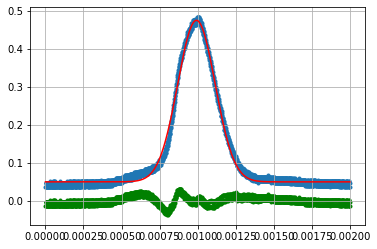

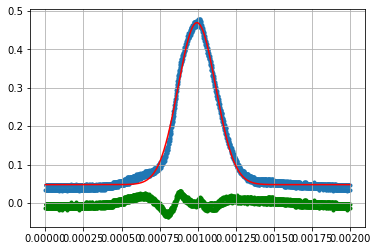

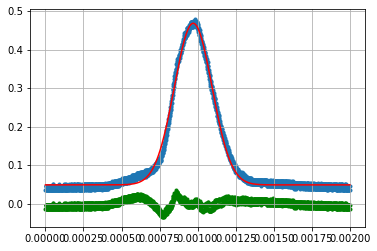

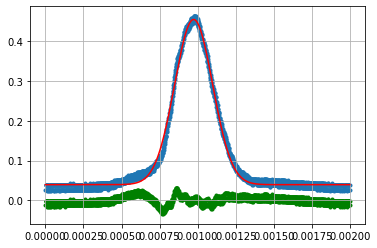

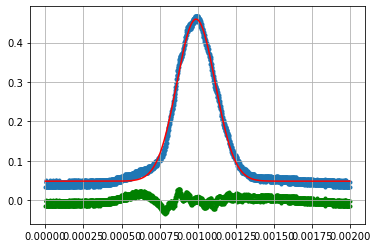

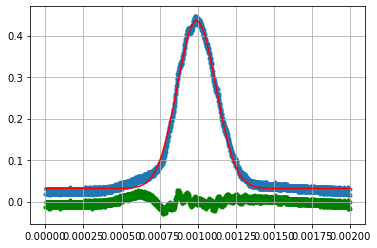

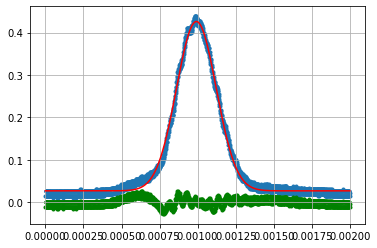

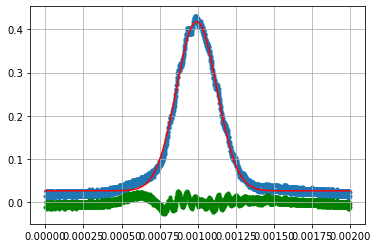

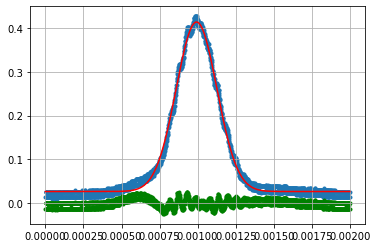

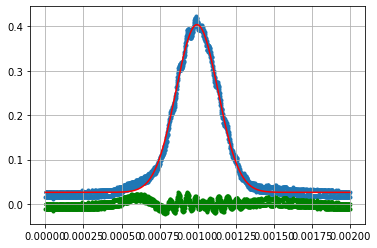

In [2]:
Time = []
Signal = []
Popt = []

index = np.arange(10)

for i in index:
    Time.append(np.array(pd.read_csv('konstante_frequenz/'+str(i)+'_HM1508.csv'))[:,0])
    Signal.append(np.array(pd.read_csv('konstante_frequenz/'+str(i)+'_HM1508.csv'))[:,1])
    popt, pcov = curve_fit(gauß, Time[i], Signal[i], maxfev=100000, p0=[1, 0.0004, 0.001,  0.05])
    x = np.linspace(min(Time[i]), max(Time[i]), 10000)
    plt.scatter(Time[i], Signal[i], marker='.')
    plt.plot(x, gauß(x, *popt), color='r')
    plt.scatter(Time[i], Signal[i] - gauß(Time[i], *popt), color='green', marker='.')
    plt.grid()
    plt.show()
    
    

# popt, pcov = curve_fit(gauß, Time[9], Signal[9], maxfev=100000, p0=[1, 0.0004, 0.001, 0.05])
# x = np.linspace(min(Time[9]), max(Time[9]), 10000)
    
    
# plt.scatter(Time[9], Signal[9], marker='.')
# plt.scatter(Time[5], Signal[5], marker='.', color='orange')
# plt.plot(Time[9], Signal[9] - gauß(Time[9], *popt), color='green')
# plt.plot(x, gauß(x, *popt), color='r')

# plt.xlim(0.0006, 0.0014)
# plt.grid()
# plt.show()'

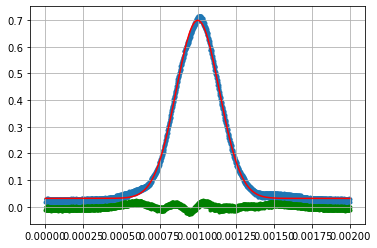

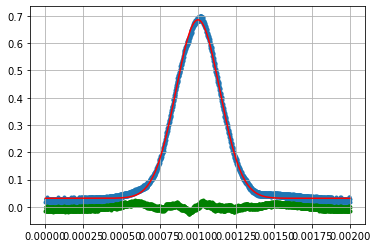

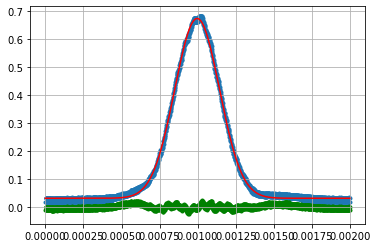

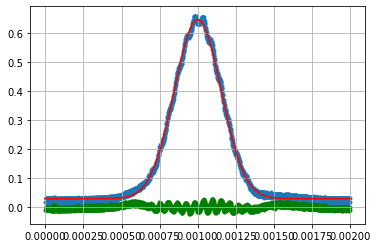

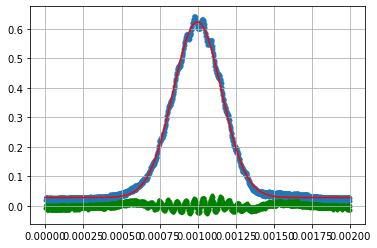

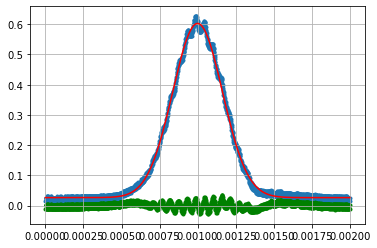

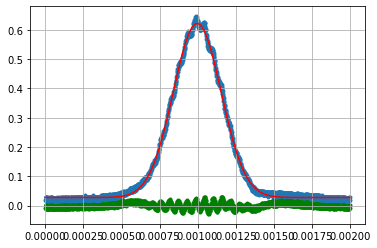

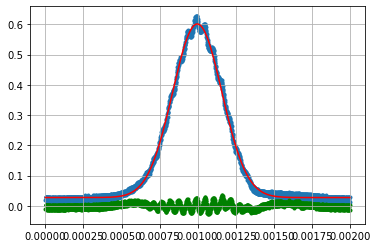

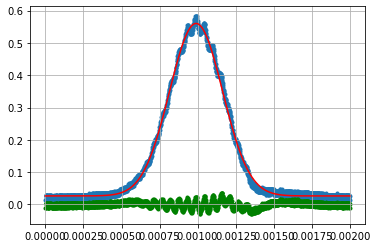

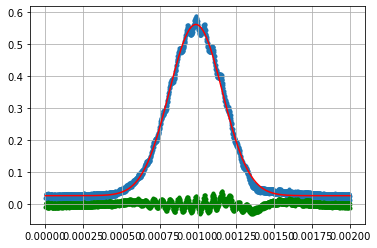

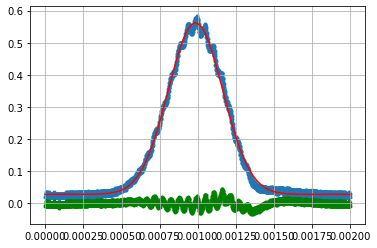

In [3]:
Time = []
Signal = []
Popt = []

index = np.arange(11)

for i in index:
    Time.append(np.array(pd.read_csv('konst_freq_2/'+str(i)+'_HM1508.csv'))[:,0])
    Signal.append(np.array(pd.read_csv('konst_freq_2/'+str(i)+'_HM1508.csv'))[:,1])
    popt, pcov = curve_fit(gauß, Time[i], Signal[i], maxfev=100000, p0=[1, 0.0004, 0.001,  0.05])
    x = np.linspace(min(Time[i]), max(Time[i]), 10000)
    plt.scatter(Time[i], Signal[i], marker='.')
    #plt.plot(x, gauß(x, *popt), color='r')
    plt.scatter(Time[i], Signal[i] - gauß(Time[i], *popt), color='green', marker='.')
    plt.grid()
    plt.show()

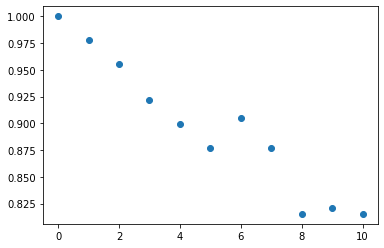

In [4]:
intensität_0_maxima = []
for i in np.arange(11):
    intensität_0_maxima.append(max(Signal[i])/max(Signal[0]))

    
plt.scatter(np.arange(11), intensität_0_maxima)